Second stab at this, taking things slowly and building on basic versions first. Also writing out my thoughts so I know whats going on. Also trying to do this with only numpy.

The core part of the algorithm that I need to code is the gradient descent

Broad view of what needs to be done is a minimization of two functions, where one function is mean squared error, and the other is the loss function. The goal is to find the combination of parameters(lambda, h(x)), that minimizes this function. The method by which this minimization occurs is gradient descent. 

Equations from geeksforgeeks.org

$$ \frac{1}{m}\left[\sum_{i=1}^{m}\left(y^{(i)}-h\left(x^{(i)}\right)\right)^{2}+\lambda \sum_{j=1}^{n} w_{j}\right] $$

First we will try coding a regular linear regression algorithm that does not have the loss function.

This involves using gradient descent to minimize 
$$ \frac{1}{m} \sum_{i=1}^{m}\left(y^{(i)}-h\left(x^{(i)}\right)\right)^{2} $$

An important part of gradient descent is computing the partial derviative of the functions with respect to a parameter in interest. In this case, these parameters are the slope and intercept of the regression line.

An basic formula for this is 
slope = slope - alpha(hyperparameter) * dm(gradient with respect to slope)
inter = inter - alpha * di(gradient with respect to slope)
Keep updating these parameteres until they converge on a value.

Here is a 1D regression, keeping track of only the slope of variable, which makes it a lot easier for me.

Calculating gradients(k used to indicate constant, subscript specifies name of variable)
(k_y - m * k_x + b)^2
dm = sum(k_y - (m * k_x + b))(2)(-k_x) = sum(-2)(k_y - ypred)(k_x)
db = sum(k_y - (m * k_x + b))(2)(-1) = sum(-2)(k_y - ypred)

Basic idea behind graident descent, nice and intuitive. 

<img src="https://editor.analyticsvidhya.com/uploads/28566Slide7.PNG" width="700"/>
<https://editor.analyticsvidhya.com/uploads/28566Slide7.PNG>

The alpha value, or how large each "step" is can be important. Smaller steps ensure you move with the curve of the function, and also prevent you from jumping past a minimum into the well of a different part of the function, sometimes where there is no nice convergent solution. Problem is, smaller steps take longer to process, so for each of my trials, I chose the largest alpha value such that the output makes sense and doesn't blow up. 

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/gradient-descent-in-machine-learning3.png" width="500"/>
https://www.javatpoint.com/gradient-descent-in-machine-learning


Visualization of other parts of the function you can escape to. 
<img src="https://www.fromthegenesis.com/wp-content/uploads/2018/06/Gradie_Desce.jpg" width="300"/>
https://www.fromthegenesis.com/gradient-descent-part-2/


(array([-1.]), 6.999999999999883)


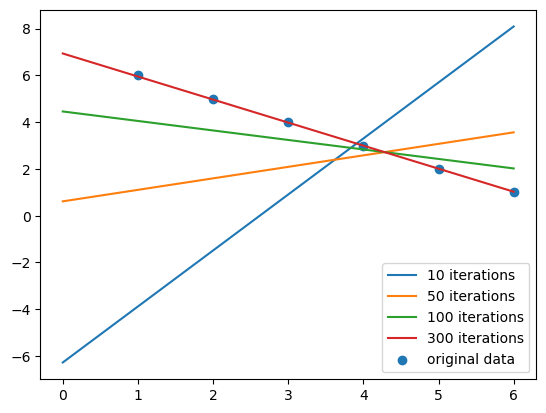

In [61]:
#1d regression

import numpy as np
import matplotlib.pyplot as plt

def onedfit(iterations, x, y, alpha):
    m = [50]
    b = 2
    x = np.array(x)
    y = np.array(y)

    #need to multiply every value in x and y, not copy over the array 3 times
    for i in range(iterations):
        #predicting, or h(x) in the formula
        pred = x * m + b
        #print('pred' + str(pred))
        delta = y-pred
        #print('y' + str(y))
        #print('delta' + str(delta))
        # print(x.T)
        # print((delta).dot(x.T))
        dm = ((x.T).dot(delta)) * -2 / len(x)
        #need to multiple each y-pred by corresponding x 
        db = np.sum(delta) * -2 / len(x)

        m = m - alpha * dm
        # if i == 0:
        #     print(b)
        b = b - alpha * db
        #print(b)
        #print('m' + str(m))
        #print('b' + str(b))
        
    return m, b

x = [1,2,3,4,5,6]
y = [6,5,4,3,2,1]

print(onedfit(10000, x, y, 0.01))

x_vec = np.linspace(0, 6, 100)

#oned1 = onedfit(1, x, y, 0.05)
oned10 = onedfit(10, x, y, 0.05)
oned50 = onedfit(50, x, y, 0.05)
oned100 = onedfit(100, x, y, 0.05)
oned300 = onedfit(300, x, y, 0.05)

#y_1i = x_vec * oned1[0] + oned1[1]
y_10i = x_vec * oned10[0] + oned10[1]
y_50i = x_vec * oned50[0] + oned50[1]
y_100i = x_vec * oned100[0] + oned100[1]
y_300i = x_vec * oned300[0] + oned300[1]

#plt.plot(x_vec, y_1i, label = '1 iteration')
plt.plot(x_vec, y_10i, label = '10 iterations')
plt.plot(x_vec, y_50i, label = '50 iterations')
plt.plot(x_vec, y_100i, label = '100 iterations')
plt.plot(x_vec, y_300i, label = '300 iterations')
plt.scatter(x, y, label = 'original data')
plt.legend()

Looks like it works, and whats cooler is you can see how the iterations progressive move the line closer to the original data. Also looks like all the lines intersect at one point, could be cool to think about how this came to be and the significance of this point.

Now onto multidimensial x, where there are m rows of samples and n columns of features. 
The code actually transfers pretty nicely. For example, to get the expected y value, you simply dot the x values across the features with the matrix of their slopes and add b, and it spits out the single y value. To get a list of expected y values from a the x matrix, you can multiply the two matrices, which dots each row of x with our m vector of slopes


(wikipedia)

To find the gradient, we use the same method, but now its a little more complicated
(k_y - ((x1m1 + x2m2 + x3m3 ...) + b))^2 -> function to be minimized, take gradient

dm = sum(i to m)(1/m)(k_y - ((x1m1 + x2m2 + x3m3 ...) + b))(2)<-x1, -x2, -x3> = (1/m) * (-2) <k_obs - k_pred> dot <x1, x2, x3...>
ypred = x.dot(m) + b
We now have a vector of the derivatives of m that is to be multiplied with a vector of y residuals. Given how this was coded before, this does not need to change. 

db = (k_y - (m * k_x + b))(2)(-1) = (-2)(k_y - ypred)
Same with b, the only thing that has changed with how we predict y from many x, this will continue to stay constant.

In [67]:
def multidfit(iterations, x, y, alpha):
    #x is now a n x m matrix
    #i rows -> different samples
    #j columns -> different features
    x = np.array(x)
    print(x)
    y = np.array(y)
    k, j = x.shape
    print(k)
    m = np.zeros(j)
    b = 1.2

    #need to multiply every value in x and y, not copy over the array 3 times
    for i in range(iterations):
        #predicting, or h(x) in the formula
        pred = x.dot(m) + b
        delta = y - pred
        #print('y' + str(y))
        dm = ((x.T).dot(delta)) * -2 / k
        #need to multiple each y-pred by corresponding x 
        db = np.sum(delta) * -2 / k
        m = m - alpha * dm
        # if i == 0:
        #     print(b)
        b = b - alpha * db
        #print(b)
        #print('m' + str(m))
        #print('b' + str(b))
        
    return m, b

def predictor(x, m, b):
    return(np.array(x).dot(np.array(m)) + b)
    
x_multi = [[0, 1, 3, 5],[4, 6, 8, 9], [9, 11, 12, 19]]
y_multi = [4, 5, 11]

multitest = multidfit(100000, x_multi, y_multi, 0.0001)

coefficients = multitest[0]
sklearn_coef = [ 0.0305373, -0.14882103, -0.29841515, 0.77850792]

print(multitest)

[[ 0  1  3  5]
 [ 4  6  8  9]
 [ 9 11 12 19]]
3
(array([ 0.04119816, -0.14466133, -0.30835657,  0.77507421]), 1.194359989214858)


In [71]:
print(coefficients)
print(predictor(x_multi[0],coefficients,1.194359989214858))
print(predictor(x_multi[1],coefficients,1.194359989214858))
print(predictor(x_multi[2],coefficients,1.194359989214858))

[ 0.04119816 -0.14466133 -0.30835657  0.77507421]
3.9999999999700355
5.0000000001168114
10.999999999944729


In [72]:
print(sklearn_coef)
print(predictor(x_multi[0],sklearn_coef, 1.1515268650947013))
print(predictor(x_multi[1],sklearn_coef,1.1515268650947013))
print(predictor(x_multi[2],sklearn_coef,1.1515268650947013))

[0.0305373, -0.14882103, -0.29841515, 0.77850792]
3.9999999850947012
4.999999965094702
10.999999915094705


In [33]:
#validation for above using built-in multiple linear regression function
from sklearn import linear_model
regr = linear_model.LinearRegression()
print(x_multi)
print(y_multi)
regr.fit(x_multi, y_multi)

print('built in coefficients: ' + str(regr.coef_))
print('my coefficients: ' + str(multitest[0]))
print('built in intercept: ' + str(regr.intercept_))
print('my intercept: ' + str(multitest[1]))

mypred = np.array(x_multi).dot(multitest[0]) + multitest[1]
builtinpred = np.array(x_multi).dot(regr.coef_) + regr.intercept_

print('my regression R2 value: ' +  str(r2_score(mypred,y_multi)))
print('built in regression R2 value: ' + str(r2_score(builtinpred,y_multi)))


[[0, 1, 3, 5], [4, 6, 8, 9], [9, 11, 12, 19]]
[4, 5, 11]
built in coefficients: [ 0.0305373  -0.14882103 -0.29841515  0.77850792]
my coefficients: [-0.22272196 -0.24763875 -0.06224701  0.86007916]
built in intercept: 1.1515268650947013
my intercept: 0.13398398848610563
my regression R2 value: 1.0
built in regression R2 value: 1.0


<div>
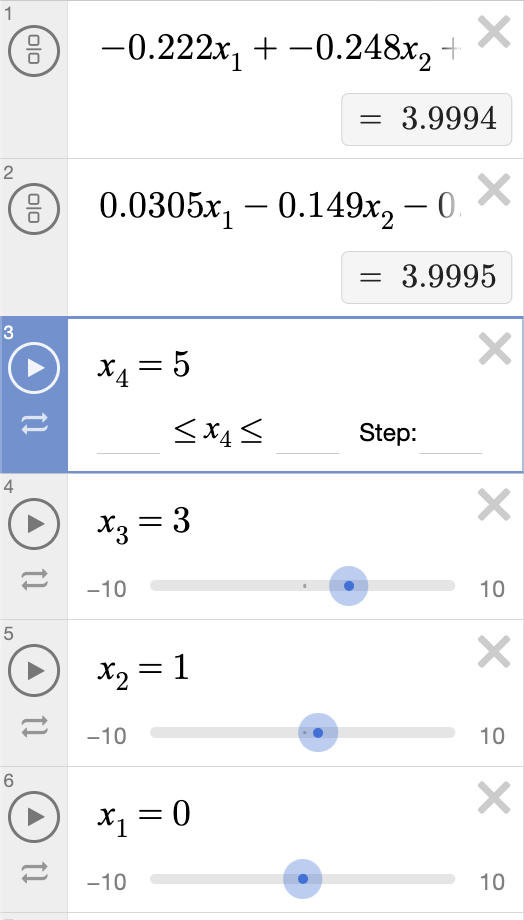
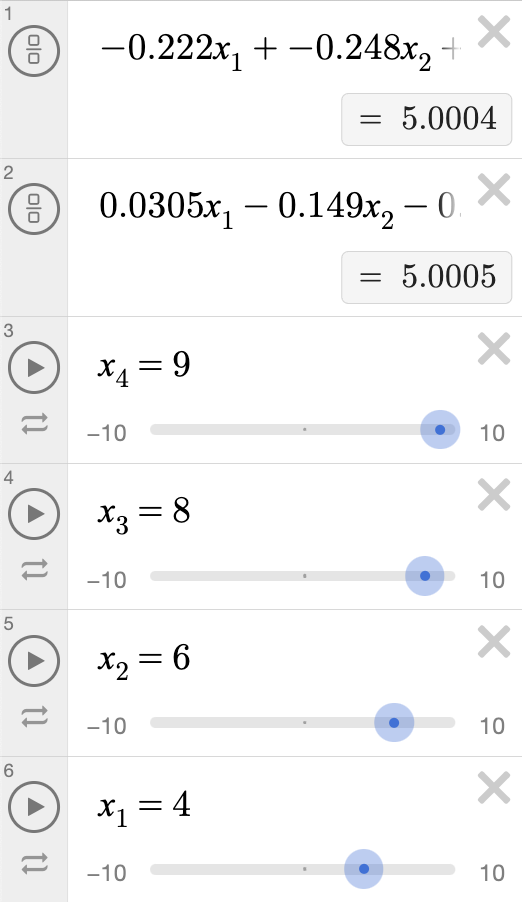
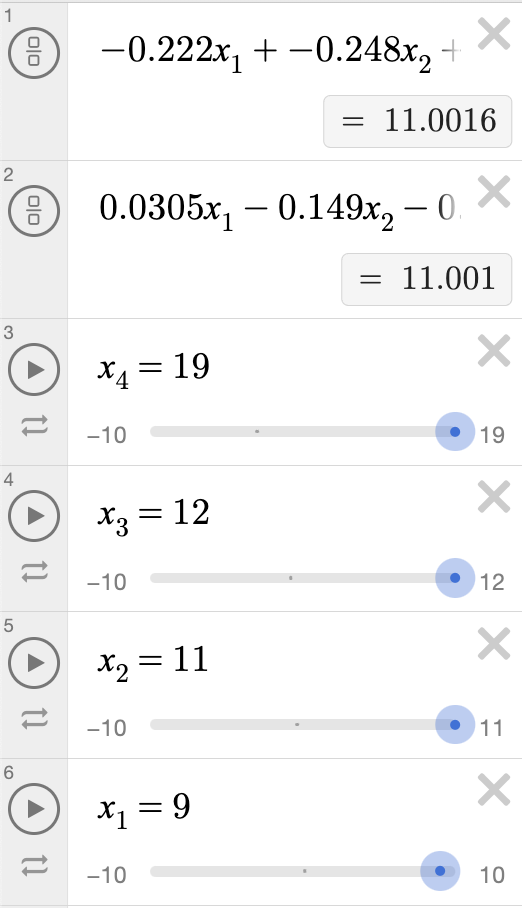
</div>

Unfortunately, the resulting coefficients and intercepts were quite different, which gave me quite a fright initially. However, when I manually used test set for predictions, both performed very well, indicating that maybe with multidimensial regressions, multiple solutions are possible depending on how you move towards a solution. The "data" was randomly generated by me typing out numbers that were generally increasing, so I'm suprised data could be fit so well. 

Ok, now its time for LASSO, which basically means adding in the loss function.
What this means is that for nonzero weights(no need to touch the ones that have become zero), there is another term that has to be factored into the gradient. 

(k_y - ((x1m1 + x2m2 + x3m3 ...) + b))^2 + lambda(m1+m2+m3...) -> function to be minimized, take gradient

dm = sum(i to m)(1/m)((k_y - ((x1m1 + x2m2 + x3m3 ...) + b))(2)<-x1, -x2, -x3>  + lambda)
    = (-2*(x.dot(m) + b + lambda) * 1/n      for m > 0
    or = (-2*(x.dot(m) + b - lambda) * 1/n   for m < 0
        The reason we have two different behaviors for the contribution of lambda is due to the loss function wishing to reduce   the absolute values to zero. This means positive values would need to be subtracted from, and negative values would need to be added to. 
        Now that we have new formulations for dm, we can use gradient descent in the same way. 

db = (-2)(k_y - ypred) * 1/m

In [ ]:
def LASSO(iterations, x, y, alpha, penalty, m_init):
    #x is now a n x m matrix
    #i rows -> different samples
    #j columns -> different features
    x = np.array(x)
    #print(x)
    y = np.array(y)
    k, j = x.shape
    #print(k)
    #m = np.zeros(j)
    m = m_init
    b = 0

    for i in range(iterations):
        #predicting, or h(x) in the formula
        pred = x.dot(m) + b
        delta = y - pred
        
        dm = np.zeros(j)
        #need to define a different dm for each of the m
        for t in range(j):
            if m[t] > 0:
                dm[t] = (1/k) * (-2 * ((x[:,t]).dot(y - pred)) + penalty)
            else:
                dm[t] = (1/k) * (-2 * ((x[:,t]).dot(y - pred)) - penalty)
                #print(dm_vec)
        #need to multiple each y-pred by corresponding x 
        
        db = np.sum(delta) * -2 / k

        #print(m)
        #print(alpha*dm)
        m = m - alpha * dm

        b = b - alpha * db
        #print(b)
        #print('m' + str(m))
        #print('b' + str(b))
        
    return m, b


[-6.83762240e-01  3.45885390e-01  4.71328373e+00 -8.51042040e-17
  4.65375342e+00 -0.00000000e+00 -1.23602635e+00  2.15600735e+00
 -9.90354336e-01 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.60091467e+00  1.42200579e+00  0.00000000e+00 -0.00000000e+00
  4.31751146e+00]
-0.6312598416237822
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 [0.868040843850624, 0.8707436796438637, 0.8732667532646431, 0.8757365164979714, 0.8780570322295321, 0.8803712321321233, 0.8825031427192815, 0.884519184112626, 0.8864791428451282, 0.888307864281714, 0.8901015706162232, 0.8917107200710747, 0.893442085560476, 0.8950059333067681, 0.8964833868748048, 0.8978477280888959, 0.899255855561977, 0.9004681162128166, 0.9016309058037966, 0.9028431090403721, 0.90395392576170

0.5026637363211635

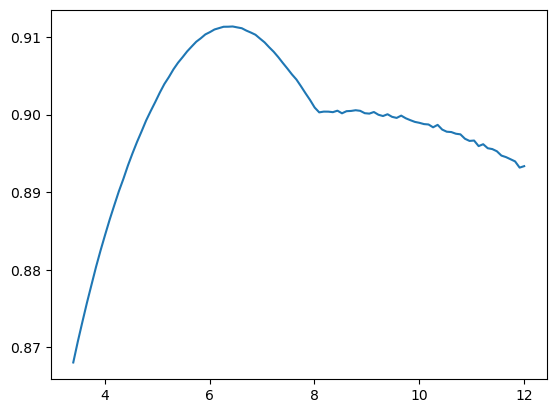

In [12]:
#Validation time
from sklearn.linear_model import Lasso
import pandas as pd
from sklearn.metrics import r2_score


df = pd.read_excel('DataMatrix_Project1.xlsx')
df_arr = df.to_numpy()

Nir_frame = []

NirvYRI = []
NirvYGI = []
#print(df_arr)

for row in range(0,79):
    if df_arr[row][1] == 'NIR' or df_arr[row][1] == 'NAR/NIR':
        Nir_frame.append(df_arr[row, 2:19])
        NirvYRI.append(df_arr[row, 20])
        NirvYGI.append(df_arr[row, 22])

justlasso = linear_model.Lasso(alpha=0.05190675028782829)
justlasso.fit(Nir_frame, NirvYRI)
fitted = justlasso.predict(Nir_frame)

print(justlasso.coef_)
print(justlasso.intercept_)
r2_score(fitted,NirvYRI)

#alpha value I found last time - 0.05190675028782829

#Ok now for my lasso
#initial_m = [-6.83762240e-01,  3.45885390e-01,  4.71328373e+00, -8.51042040e-17,
 #  4.65375342e+00, -0.00000000e+00, -1.23602635e+00,  2.15600735e+00,
 # -9.90354336e-01, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
 # -2.60091467e+00,  1.42200579e+00,  0.00000000e+00, -0.00000000e+00,
 #  4.31751146e+00]

initial_m = np.zeros(17)
lambdas = np.linspace(3.4, 12, 100)

r2s = []
for i in range(len(lambdas)):
    m, b = LASSO(10000, Nir_frame, NirvYRI, 0.05190675028782829, lambdas[i], initial_m)
    fittedMyLASSO = np.array(Nir_frame).dot(m) + b
    r2s.append(r2_score(justlasso.coef_, m))
    print(i, end = ' ')

print(r2s)
#lets compare r2 values, and find the optimal penalty that matches my Lasso to the built in Lasso

plt.plot(lambdas, r2s)

r2_score(fittedMyLASSO,NirvYRI)



In [25]:
m, b = LASSO(10000, Nir_frame, NirvYRI, 0.05190675028782829, 6.41, initial_m)
fittedMyLASSO = np.array(Nir_frame).dot(m) + b

r2_score(fittedMyLASSO,NirvYRI)

0.6196852156040918

In [24]:
r2_score(fitted,NirvYRI)

0.6354981229099963

35
6.41
[-4.67796439e-01  1.77165385e-01  3.01917404e+00 -1.79311375e+00
  4.57155567e+00 -6.14975308e-04 -1.20829627e+00  2.04561756e+00
 -8.91822544e-01 -1.31555038e-03  4.06213398e-03 -2.53300963e-04
 -2.52441543e+00  1.27623380e+00  7.53855908e-03  1.28315215e-03
  4.15928676e+00]


Text(0.5, 1.0, 'coefficients of built-in lasso vs my Lasso algo')

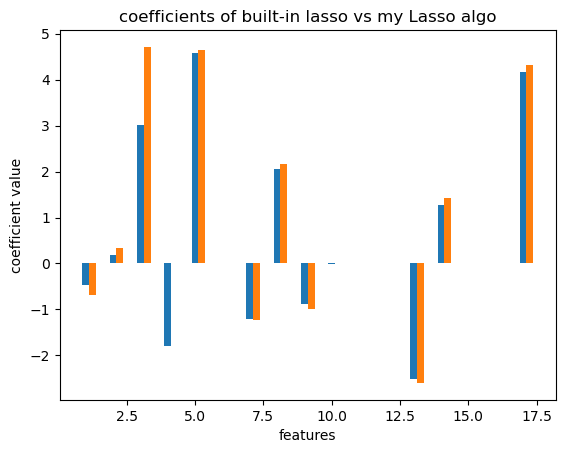

In [27]:
r2_score(justlasso.coef_, m)
max(r2s)
print(r2s.index(0.9113741879734538))
print(35*((12-3.4)/100)+3.4)

LASSO(10000, Nir_frame, NirvYRI, 0.05190675028782829, 6.41, initial_m)
print(m)

plt.figure()
numbers = np.arange(1,18)
width = 0.25
plt.bar(numbers, m, label = 'My version', width = width)
plt.bar(numbers + width, justlasso.coef_, label = 'Built-in(from library)', width = width)
plt.xlabel('features')
plt.ylabel('coefficient value')
plt.title('coefficients of built-in lasso vs my Lasso algo')


The data used was from Project 1, the data that prompted this in the first place. 

In the end, the algorithm I developed does not perfectly agree with the output of sklearn Lasso, and was unable to fully shrink coefficients to zero. However, with proper tuning of the L1 penalty, there is somewhat close agreement between the two models, with an r^2 of 0.911 at the highest point, when lambda is set around 6.41. I think the algorithm I coded manages to capture the essence of Lasso algorithm, as the same coefficients are shrunk, just not to the same degree. I'll continue working on this to figure out how to get full shrinkage to zero of some of the variables. 

Basically the algorithm is not actually working, and I'm not sure if the built-in Lasso has other steps under the hood or if I'm somehow doing the gradient descent wrong when the shrinkage term is added on. 

-7 hours of my life

# 